## Notebook to analyze data from game changer seasonal stat export

In [16]:
#import packages

import pandas as pd
from matplotlib import pyplot as plt

In [40]:
#Read csv into initial_df. Provide path to csv

initial_df = pd.read_csv('../data/tnbh11202022.csv')

In [44]:
#drop the row that contains the glossary. At this point, the column is still 'Unamed: 0'

initial_df.drop(initial_df[initial_df['Unnamed: 0'] == 'Glossary'].index, inplace = True)

In [51]:
#In the first row of the seasonal stats csv, there are 3 columm values. 'Batting', 'Pitching', and 'Fielding'

#Grab Number, Last, and First columns and save as player_df. we can use this as the first 3 columns in pitching and fielding dataframes
player_df = initial_df.iloc[:,:3]

#We want to slice the data from column1 to the 'Pitching' value. Drop the 'Pitching' column and call the new dataframe, initial_batting_df
initial_batting_df = initial_df.loc[:,:'Pitching'].drop(['Pitching'], axis='columns')

#Slice the csv from 'Pitching' to 'Fielding' and create the initial_pitching_df. Drop the 'Fielding' column at the end

initial_pitching_df = initial_df.loc[:,'Pitching':'Fielding'].drop(['Fielding'], axis='columns')

#Slice the csv from 'Fielding' to the end of the last column
initial_fielding_df = initial_df.loc[:,'Fielding':]

#Add the Number, First, and Last columns to the pitching and fielding dataframe. Batting was already set
initial_pitching_df = pd.concat([player_df, initial_pitching_df], axis = 1)
initial_fielding_df = pd.concat([player_df, initial_fielding_df], axis = 1)



In [72]:
#we need to change the column header row from the "unamed" headers to the first row in the csv which contain headers like "AVG", "OBS", etc

#grab the first row for the header
new_batting_header = initial_batting_df.iloc[0]
new_pitching_header = initial_pitching_df.iloc[0]
new_fielding_header = initial_fielding_df.iloc[0]

#take the data minus the header row. this creates a new dataframe

# (deprecated) initial_batting_df_drop_header_row = initial_batting_df[1:]
initial_batting_df_drop_header_row = initial_batting_df.iloc[1:,:]
initial_pitching_df_drop_header_row = initial_pitching_df.iloc[1:,:]
initial_fielding_df_drop_header_row = initial_fielding_df.iloc[1:,:]

#set the header row as the df header. the .column sets the headers of the dataframe
initial_batting_df_drop_header_row.columns = new_batting_header
initial_pitching_df_drop_header_row.columns = new_pitching_header
initial_fielding_df_drop_header_row.columns = new_fielding_header


In [75]:
#drop rows where the 'Number' column contains nulls

# (deprecated) initial_batting_df_drop_nan = initial_batting_df_drop_header_row[initial_batting_df_drop_header_row['Number'].notna()]
initial_batting_df_drop_nan = initial_batting_df_drop_header_row[initial_batting_df_drop_header_row.loc[:,'Number'].notna()]
initial_pitching_df_drop_nan = initial_pitching_df_drop_header_row[initial_pitching_df_drop_header_row.loc[:,'Number'].notna()]
initial_fielding_df_drop_nan = initial_fielding_df_drop_header_row[initial_fielding_df_drop_header_row.loc[:,'Number'].notna()]

initial_batting_df_drop_total = initial_batting_df_drop_nan[initial_batting_df_drop_nan['First'].notna()]
initial_pitching_df_drop_total = initial_pitching_df_drop_nan[initial_pitching_df_drop_nan['First'].notna()]
initial_fielding_df_drop_total = initial_fielding_df_drop_nan[initial_fielding_df_drop_nan['First'].notna()]

#Convert IP column from object type to float type, then remove all rows with IP (innings pitchted) greater than zero. This should leave only pitchers in this dataframe
initial_pitching_df_drop_total.loc[:,"IP"] = initial_pitching_df_drop_total["IP"].astype(float)
initial_pitching_df_drop_total = initial_pitching_df_drop_total.loc[(initial_pitching_df_drop_total['IP'] > 0)]



In [83]:

#initial_batting_df_drop_nan["Number"] = initial_batting_df_drop_nan["Number"].astype(int)
initial_batting_df_drop_total.astype({'GP':'int', 'AVG':'float', 'OBP':'float', 'OPS':'float', 'First':'string'})
#initial_batting_df_drop_nan.loc[:,"GP"] = initial_batting_df_drop_nan["GP"].astype(int)
#initial_batting_df_drop_nan.loc[:,"AVG"] = initial_batting_df_drop_nan["AVG"].astype(float)
#initial_batting_df_drop_nan.loc[:,"OBP"] = initial_batting_df_drop_nan["OBP"].astype(float)
#initial_batting_df_drop_nan.loc[:,"OPS"] = initial_batting_df_drop_nan["OPS"].astype(float)
#initial_batting_df_drop_nan.loc[:,"First"] = initial_batting_df_drop_nan["First"].astype(str)

#initial_batting_df_drop_total.loc[:,"GP"] = initial_batting_df_drop_total["GP"].astype(int)
#initial_batting_df_drop_total.loc[:,"AVG"] = initial_batting_df_drop_total["AVG"].astype(float)
#initial_batting_df_drop_total.loc[:,"OBP"] = initial_batting_df_drop_total["OBP"].astype(float)
#initial_batting_df_drop_total.loc[:,"OPS"] = initial_batting_df_drop_total["OPS"].astype(float)
#initial_batting_df_drop_total.loc[:,"First"] = initial_batting_df_drop_total["First"].astype(str)

initial_batting_df_drop_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 15
Data columns (total 54 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Number   15 non-null     object 
 1   Last     14 non-null     object 
 2   First    15 non-null     object 
 3   GP       15 non-null     int64  
 4   PA       15 non-null     object 
 5   AB       15 non-null     object 
 6   AVG      15 non-null     float64
 7   OBP      15 non-null     float64
 8   OPS      15 non-null     float64
 9   SLG      15 non-null     object 
 10  H        15 non-null     object 
 11  1B       15 non-null     object 
 12  2B       15 non-null     object 
 13  3B       15 non-null     object 
 14  HR       15 non-null     object 
 15  RBI      15 non-null     object 
 16  R        15 non-null     object 
 17  BB       15 non-null     object 
 18  SO       15 non-null     object 
 19  K-L      15 non-null     object 
 20  HBP      15 non-null     object 
 21  SAC      15 non-nu

In [47]:
# Create a new dataframe with platers who have played 8 games or more

final_batting_df = initial_batting_df_drop_total.loc[(initial_batting_df_drop_total['GP'] >= 8)]

,Number,Last,First,GP,PA,AB,AVG,OBP,OPS,SLG,...,PS,PS/PA,2S+3,2S+3%,6+,6+%,AB/HR,GIDP,GITP,CI
1,0,H,Cameron,20,29,20,0.200,0.429,0.629,0.2,...,113,3.897,4,13.79,6,20.69,0,0,0,0
2,3,T,Kyndall,27,45,35,0.171,0.356,0.527,0.171,...,155,3.444,3,6.67,5,11.11,0,0,0,0
3,4,O,Mia,23,42,38,0.289,0.341,0.684,0.342,...,135,3.214,3,7.14,5,11.9,0,0,0,0
4,9,V,Lauren,26,49,46,0.217,0.265,0.483,0.217,...,133,2.714,3,6.12,3,6.12,0,0,0,0
6,13,W,Kyler,23,43,38,0.211,0.302,0.565,0.263,...,128,2.977,4,9.3,4,9.3,0,0,0,0
8,17,W,Lauren Paige,20,32,27,0.333,0.438,0.993,0.556,...,117,3.656,7,21.88,5,15.63,0,0,0,0
9,24,McCord,Aleigha,23,48,42,0.381,0.447,0.828,0.381,...,155,3.229,3,6.25,5,10.42,0,0,0,0
10,25,H,Ava,14,20,13,0.385,0.579,1.271,0.692,...,71,3.55,1,5,4,20,0,0,0,0
11,32,Costello,Lyric,20,40,32,0.375,0.474,0.974,0.5,...,115,2.875,2,5,2,5,0,0,0,0
12,33,H,AC,25,53,39,0.385,0.547,0.932,0.385,...,188,3.547,3,5.66,7,13.21,0,0,0,0


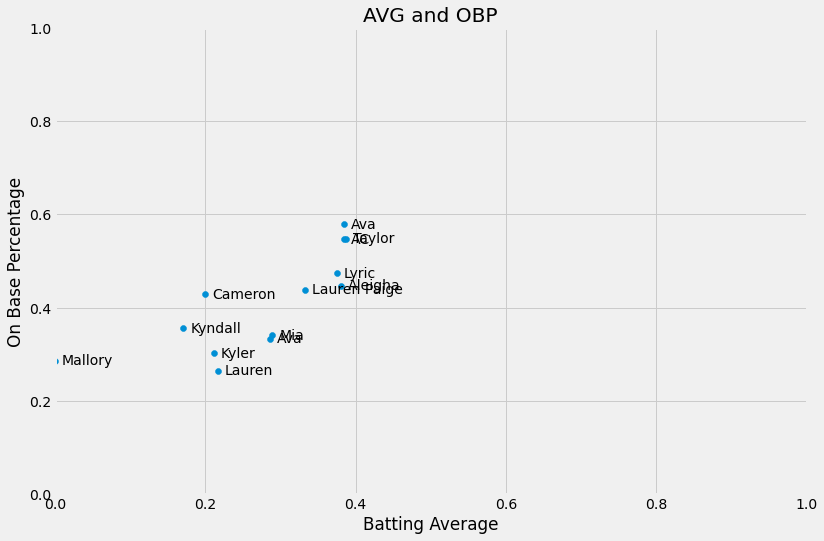

In [48]:
# Plot the AVG column on the x-axis and the OBP column on the y-axis
# plt.xlim and plt.ylim moves the graph out to 1.0 which is a 1000 batting average and 1000 on base percentage
# plt.figure increases the plot size so the scatter plot is not so crowded
fig = plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.scatter(final_batting_df["AVG"], final_batting_df["OBP"])
plt.xlabel("Batting Average")
plt.ylabel('On Base Percentage')
plt.title('AVG and OBP')
plt.grid()
plt.xlim((0,1))
plt.ylim((0,1))


for x_pos, y_pos, label in zip(final_batting_df["AVG"], final_batting_df["OBP"], final_batting_df["First"]):
    plt.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# plt.savefig('avg_obp.png') 
# gc_team_t = np.transpose(gc_team)

#plt.grid() shows grid lines on the plot
plt.grid()

plt.show()

<BarContainer object of 13 artists>

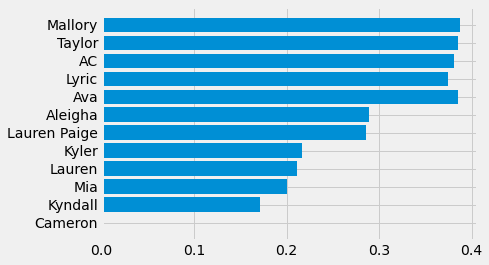

In [49]:
#horizontal bar chare of batting averages, sorted AVG with the sorted() function
plt.barh(final_batting_df.First, sorted(final_batting_df.AVG))
